# Numpy


NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. 
- In some ways, NumPy arrays are like Python’s built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
- NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python

First, install `numpy` and load it. I checked my version of `numpy` and upgraded it since it's outdated.

In [5]:
import numpy as np
np.__version__

'1.24.1'

In [4]:
# %%cmd
# pip list --outdated

In [ ]:
# %%cmd
# pip install --upgrade numpy

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Built-In Documentation
- Display all the contents of the numpy namespace: `np.<TAB>`

- Display NumPy's built-in documentation: `np?`

- More detailed documentation, tutorials and other resources, go to http://www.numpy.org.

## Concepts of Array
An array is a grid of values. It contains the information of the raw data, such as:
- How to locate an element
- How to interpret an element

### Data Types in Python

- The standard Python implementation is written in C. 
    - Every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well.

- This extra information in the Python integer structure is what allows Python to be coded so freely and dynamically. Of course, it comes with cost. 

- There is some overhead in storing an integer in Python as compared to an integer in a compiled language like C. 


For example, when you create an integer `x = 1` in Python, x is not jsut a "raw" integer. 

A single integer in Python (e.g., version 3.4) contains 4 pieces:
1. `ob_refcnt`, a reference count that helps Python silently handle memory allocation and deallocation
2. `ob_type`, encodes the type of the variable
3. `ob_size`, specifies the size of the following data members
4. `ob_digit`, contains the actual integer value that we expect the Python variable to represent

<br><br>
<center><img src="images/Numpy_1.JPG" width = "500"></center>
<center>Difference between C and Python integers (Ref. Python Data Science Handbook)</center>

### Dynamic-type list & fixed-type array (NumPy-style)

There are various differences between list and Numpy array.

1. The array contains a single pointer to one contiguous block of data. 

2. The Python list, contains a pointer to a block of pointers, each of which in turn points to full Python object like the Python integer. 

Then, why would we prefer one towards the other?

1. The advantage of list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type

2. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

<center><img src="images/Numpy_4.JPG" width = "680"></center>
<center>Difference between C and Python lists (Ref. Python Data Science Handbook p.38)</center>

**Note**: it's important to know about the basic data structure in Python: list, dictionary, etc. If you forget, please go to this tutorial to review: [Summary of List in Python](https://github.com/YuxiaoLuo/Intro_Python/blob/main/Week12/12_Lists.ipynb).

In [68]:
# we can use list to hold multiple items in Python
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
# convert each element to string
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [72]:
# list can store different types
L3 = [True, "2", 3.0, 4]
[type(element) for element in L3]

[bool, str, float, int]

Python offers a built-in `array` module (available since Python 3.3) to create dense arrays of a uniform type. But it's less useful than the `Numpy` array. In the example below, `'i'` is type code indicating the contents are integers.

In [7]:
import array

# create a list from 1 to 10
L = list(range(1,11))
print(L)

# create an array
A = array.array('i', L)
print(A)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array('i', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [4]:
# use Help document to learn about the object
array.array?

## NumPy Arrays
#### Overview
- Support vectorized operations, while lists don't
- In the context of high-level languages like Python, Matlab, and R, the term vectorization describes the use of optimized, pre-compiled code written in a low-level language (e.g. C) to perform mathematical operations over a sequence of data
- cannot be changed in size -- have to create a new array or overwrite existing one

- each has one and only one dtype - all items in each array are of that same dtype
- an equivalent numpy array occupies much less space than a python list
- http://www.numpy.org

### Creating array from Python lists

In [171]:
# create arrays from Python lists
x = np.array([1, 4, 2, 5, 3])

type(x)

# NumPy is constrained to arrays containing the same type 
# integers are upcast to floating point 
np.array([3.14, 4, 2, 3])

numpy.ndarray

array([3.14, 4.  , 2.  , 3.  ])

In [172]:
# set the data type: use dtype keyword
# https://numpy.org/doc/stable/reference/arrays.dtypes.html 
np.array([1, 2, 3, 4], dtype = "float32")


array([1., 2., 3., 4.], dtype=float32)

In [176]:
# convert float to int
np.array([2.3, 3.9, 4.4], dtype = "int32")

array([2, 3, 4])

In [79]:
# nested lists result in multidimensional arrays
np.array([range(i, i+4) for i in [2, 4, 6]])

array([[2, 3, 4, 5],
       [4, 5, 6, 7],
       [6, 7, 8, 9]])

### Creating array from scratch
Numpy offers built-in routines to create arrays.

In [184]:
# length-10 integer array filled with zeros
np.zeros(10, dtype = int)

# 3x5 floating-point array filled with 1s
np.ones((3,5), dtype = float)

# 3x5 array filled with 3.14 
np.full((3,5), 3.14)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [190]:
# array filled with linear sequence 
# starting at 0, ending at 20, stepping by 2
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [193]:
# array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [85]:
# 3x3 array of uniformly distributed 
# random values between 0 and 1
np.random.random((3,3))

array([[0.33739616, 0.64817187, 0.36824154],
       [0.95715516, 0.14035078, 0.87008726],
       [0.47360805, 0.80091075, 0.52047748]])

In [197]:
# 3x3 array of normally distributed random values 
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3,3))

array([[ 0.65252896, -1.18102944, -1.01489007],
       [-0.96732772,  1.37622696,  0.4215631 ],
       [ 1.10019023,  0.31640099,  0.93341229]])

In [88]:
# 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3,3))

array([[7, 9, 9],
       [3, 6, 7],
       [2, 0, 3]])

In [200]:
# 3x3 identity matrix
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [201]:
# uninitialized array of 3 integers 
# values will be whatever happens to already exist at that memory location
np.empty(5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [7]:
# help(np.random.normal)

In [222]:
# generate random integer in a one-dimensional array
np.arange(0, 10)
# generate random integer in a 3x3 array 
np.random.randint(1,10, (3,3))
# generate any array from uniform distrbution 
np.random.random((3,3))
# generate an 5x7 array from standardized normal distribution 
np.random.normal(0,1,(5,7))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[7, 6, 9],
       [1, 7, 2],
       [3, 3, 7]])

array([[0.3252151 , 0.70477386, 0.60989438],
       [0.61564986, 0.25520599, 0.87127332],
       [0.15199145, 0.53807213, 0.23170221]])

array([6.40142091, 6.89471508])

#### NumPy Standard Data Types

The standard NumPy data types are listed below. 
- When constructing an array, you can specify them using a string:
`np.zeros(10, dtype = 'int16')`
- Or using the associated NumPy object: 
`np.zeros(10, dtype = np.int16)`


<br><br>
<center><img src="images/numpy_2.JPG" width = "500"></center>
<center>Figure.2 Standard NumPy data types </center>

### Basics of Numpy arrays
- Attributes of arrays: determining the size, shape, memory consumption, and data types of arrays
- Indexing of arrays: getting and setting the value of individual array elements
- Slicing of arrays: getting and setting smaller subarrays within a larger array
- Reshaping of arrays: changing the shape of a given array
- Joining and splitting of arrays: combining multiple arrays into one, and splitting one array into many

#### NumPy array attributes
- define arrays in different dimensions
- use NumPy's random number generator and `seed()` to ensure each time the random arrays are the same

In [136]:
import numpy as np 
np.random.seed(2022) # seed for reproducibility

x1 = np.random.randint(10, size = 6)
x2 = np.random.randint(10, size = (3,4)) 
x3 = np.random.randint(10, size = (3, 4, 5))

x1; x2; x3

array([0, 1, 1, 0, 7, 8])

array([[2, 8, 0, 5],
       [9, 1, 3, 8],
       [0, 3, 6, 8]])

array([[[0, 1, 2, 0, 5],
        [7, 5, 1, 7, 5],
        [5, 4, 8, 2, 3],
        [1, 0, 4, 5, 0]],

       [[7, 5, 5, 8, 2],
        [4, 0, 9, 4, 9],
        [8, 8, 0, 3, 9],
        [5, 2, 1, 7, 2]],

       [[1, 7, 9, 6, 6],
        [7, 2, 9, 1, 9],
        [4, 0, 4, 4, 7],
        [8, 7, 1, 2, 9]]])

In [227]:
# number of dimensions
x3.ndim
# size of each dimension
x3.shape
# total size of the array
x3.size
# data type of the array
x3.dtype
# itemsize: size (in bytes) of each array element
x3.itemsize
# nbytes: total size (in bytes) of the array
x3.nbytes

3

(3, 4, 5)

60

dtype('int32')

4

240

### Reshaping, Concatenation, Splitting
- Reshaping: `reshape((x,y))`
- Concatenation: `np.concatenate`, `np.vstack` (vertical stack), and `np.hstack` (horizontal stack). `np.concatenate` takes a tuple or list of arrays as its first argument
- Splitting: `np.split`, `np.hsplit`, `np.vsplit`

In [733]:
grid = np.arange(1, 10).reshape((3,3))
grid

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [734]:
# concatenate() works with same dimension array
x = np.array([1,2,3])
y = np.array([3,2,1])
x
y

np.concatenate([x, y])

array([1, 2, 3])

array([3, 2, 1])

array([1, 2, 3, 3, 2, 1])

In [741]:
# concatenate more than 2 arrays
# note z is list
z = [99, 99 ,99]
type(z)
a = np.concatenate([x,y,z])
a

list

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

In [746]:
# concatenate 2-dimensional arrays
grid = np.array([[1, 2, 3],
                [4, 5, 6]])
grid

new_grid = np.concatenate([grid, grid])
new_grid
new_grid.shape

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

(4, 3)

In [752]:
# concatenate along the second axies (zero-indexed)
new_grid = np.concatenate([grid, grid], axis = 1)
new_grid
new_grid.shape

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

(2, 6)

In [754]:
# mixed dimensions arrays
x = np.array([1, 2, 3])

grid = np.array([[9, 8, 7],
                [6, 5, 4]])
# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [764]:
# horizontally stack arrays
y = np.array([1,2]).reshape((2,1))
y
grid
np.hstack([y, grid])

array([[1],
       [2]])

array([[9, 8, 7],
       [6, 5, 4]])

array([[1, 9, 8, 7],
       [2, 6, 5, 4]])

In [773]:
y = np.array([[99],
             [95]])
y
grid
np.hstack((grid,y))

array([[99],
       [95]])

array([[9, 8, 7],
       [6, 5, 4]])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 95]])

In [308]:
# np.dstack stack arrays along the third axis
x = np.array([[[1,2,3],
             [4,5,6]],
             
             [[7,8,9],
             [10,11,12]]])
x
y = np.array([[[99, 82, 77],
              [23,24,76]],
             
             [[57, 72, 44],
             [29, 31, 39]]])
y

np.dstack((x,y))

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

array([[[99, 82, 77],
        [23, 24, 76]],

       [[57, 72, 44],
        [29, 31, 39]]])

array([[[ 1,  2,  3, 99, 82, 77],
        [ 4,  5,  6, 23, 24, 76]],

       [[ 7,  8,  9, 57, 72, 44],
        [10, 11, 12, 29, 31, 39]]])

In [774]:
x = np.array([[1, 2, 3],
             [10,11,12]])
x
grid = np.array([[9, 8, 7],
                [6, 5, 4]])
grid

# vertically stack the arrays
np.dstack([x, grid])

array([[ 1,  2,  3],
       [10, 11, 12]])

array([[9, 8, 7],
       [6, 5, 4]])

array([[[ 1,  9],
        [ 2,  8],
        [ 3,  7]],

       [[10,  6],
        [11,  5],
        [12,  4]]])

In [776]:
np.dstack?

In [779]:
# splitting
# pass a list of indices giving split points
x = [1,2,3,99,99,3,2,1]
x
x1,x2,x3 = np.split(x, [3,5])
print(x1, x2, x3)

# N split points lead to N+1 subarrays
grid = np.arange(16).reshape((4,4))
grid

np.hsplit(grid, [2])

upper, lower = np.vsplit(grid, 2)
upper
lower

[1, 2, 3, 99, 99, 3, 2, 1]

[1 2 3] [99 99] [3 2 1]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

#### Array indexing: accessing single elements
- In one-dimensional array, access the ith value using square brackets, like lists.
- In multidimensional array, access items using a comma-separated tuple of indices.
- NumPy arrays have fixed type. If you insert a floating-point vlaue to an integer array, the value will be sliently truncated.

In [142]:
x1
x1[4]
x1[-2]

array([0, 1, 1, 0, 7, 8])

7

7

In [145]:
x2

# 1st row, 1st col
x2[0,0]

# 1st row, 3rd col
x2[0,2]

array([[2, 8, 0, 5],
       [9, 1, 3, 8],
       [0, 3, 6, 8]])

2

0

In [146]:
# you can also modify values 
x2[0, 0] = 12
x2

array([[12,  8,  0,  5],
       [ 9,  1,  3,  8],
       [ 0,  3,  6,  8]])

In [148]:
x1
x1[0] = 3.1415926
# floating will be truncated
x1

array([0, 1, 1, 0, 7, 8])

array([3, 1, 1, 0, 7, 8])

#### Array Slicing: accessing subarrays

- The NumPy slicing syntax is `x[start:stop:step]`. 
- If any of these are unspecified, they default to the values `start=0, stop=size of dimension, step=1`.

In [229]:
#syntax
#x[start:stop:step]

#one dimension array
x = np.arange(10)
print(x)

#find first five elements from array x
x[0:5]
x[:5]

#find a middle subarray 
x[3:7]

#find even numbers from x
x[0::2]

#find odd numbers from x
x[1::2]

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4])

array([0, 1, 2, 3, 4])

array([3, 4, 5, 6])

array([0, 2, 4, 6, 8])

array([1, 3, 5, 7, 9])

In [238]:
#Multidimensional subarrays

# reproduction
np.random.seed(0)

x = np.random.randint(20,size=(4,3))

print(x)

#find first two rows, three columns
x[:2]
x[:2,:3]

#second row
x[1:2]
x[1]

#first column
x[:, 0]

#first two columns, 2nd and 4th rows
x[1::2, :2]


[[12 15  0]
 [ 3  3  7]
 [ 9 19 18]
 [ 4  6 12]]


array([[12, 15,  0],
       [ 3,  3,  7]])

array([[12, 15,  0],
       [ 3,  3,  7]])

array([[3, 3, 7]])

array([3, 3, 7])

array([12,  3,  9,  4])

array([[3, 3],
       [4, 6]])

In [367]:
# loops
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size = 5)
print(values)
compute_reciprocals(values)

[6 1 4 4 8]


array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

### Computation on NumPy arrays: universal functions

Python’s default implementation (known as CPython) does some operations very
slowly. This is in part due to the dynamic, interpreted nature of the language: the fact
that types are flexible, so that sequences of operations cannot be compiled down to
efficient machine code as in languages like C and Fortran.

- Vectorized operation: this vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

- Vectorized operations in NumPy are implemented via *ufuncs*, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.

- Ufuncs can operate on scalar and an array or two arrays.

In [373]:
# compare the time

big_array = np.random.randint(1, 100, size = 1000000)
%timeit compute_reciprocals(big_array)

1.97 s ± 85 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [377]:
%timeit (1.0 / big_array)

3.49 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [378]:
# Ufuncs on two arrays
np.arange(5)/np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [384]:
# multi-dimension array
x = np.arange(9).reshape((3,3))
x
x * 2
x ** 2
2 ** x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]])

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]], dtype=int32)

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

### Explore NumPy's Ufuncs
- unary ufuncs: operate on a single input 
- binary ufuncs: operate on two inputs

In [393]:
# Array arithmetic
x = np.arange(4)

# remainder
x % 5
# exponential
x ** 2
# floor division
x // 2

(-0.5 * x + 10)**2

array([0, 1, 2, 3], dtype=int32)

array([0, 1, 4, 9], dtype=int32)

array([0, 0, 1, 1], dtype=int32)

array([100.  ,  90.25,  81.  ,  72.25])

In [404]:
# built-in NumPy functions
x
np.add(x ,2)

np.subtract(x , 1)

np.negative(x)

np.multiply(x, 10)

np.divide(x, 10)

np.floor_divide(x, 10)

np.power(2, x)

np.mod(x, 1)

array([0, 1, 2, 3])

array([2, 3, 4, 5])

array([-1,  0,  1,  2])

array([ 0, -1, -2, -3])

array([ 0, 10, 20, 30])

array([0. , 0.1, 0.2, 0.3])

array([0, 0, 0, 0], dtype=int32)

array([1, 2, 4, 8], dtype=int32)

array([0, 0, 0, 0], dtype=int32)

In [406]:
# absolute value
x = np.array([-2, -1, 0, 3, 4])
abs(x)
np.abs(x)
np.absolute(x)

array([2, 1, 0, 3, 4])

array([2, 1, 0, 3, 4])

array([2, 1, 0, 3, 4])

In [410]:
# ufunc can also handle complex data
x = np.array([-3, -4j, 4 - 3j, 2 + 0j, 0 + 1j])
x
np.abs(x)

array([-3.+0.j, -0.-4.j,  4.-3.j,  2.+0.j,  0.+1.j])

array([3., 4., 5., 2., 1.])

In [414]:
# trigonometric functions

# define an array of angles
theta = np.linspace(0, np.pi, 3)
theta
np.sin(theta)
np.cos(theta)
np.tan(theta)

array([0.        , 1.57079633, 3.14159265])

array([0.0000000e+00, 1.0000000e+00, 1.2246468e-16])

array([ 1.000000e+00,  6.123234e-17, -1.000000e+00])

array([ 0.00000000e+00,  1.63312394e+16, -1.22464680e-16])

In [415]:
# inverse trigonometric functions
x = [-1, 0 ,1]
np.arcsin(x)
np.arccos(x)
np.arctan(x)

array([-1.57079633,  0.        ,  1.57079633])

array([3.14159265, 1.57079633, 0.        ])

array([-0.78539816,  0.        ,  0.78539816])

In [422]:
# exponents and logarithms
x = [1, 2 ,3]
np.exp(x)
np.exp2(x)
np.power(3, x)

array([ 2.71828183,  7.3890561 , 20.08553692])

array([2., 4., 8.])

array([ 3,  9, 27], dtype=int32)

In [426]:
# logarithms
x = [1, 2, 4, 10]
np.log(x)
np.log2(x)
np.log10(x)

array([0.        , 0.69314718, 1.38629436, 2.30258509])

array([0.        , 1.        , 2.        , 3.32192809])

array([0.        , 0.30103   , 0.60205999, 1.        ])

In [428]:
# when x is very small
# these functions give more precise values than 
# if the raw np.log or np.exp were used
x = [0, 0.001, 0.01, 0.1]
np.expm1(x)
np.log1p(x)

array([0.        , 0.0010005 , 0.01005017, 0.10517092])

array([0.        , 0.0009995 , 0.00995033, 0.09531018])

In [241]:
# fancy indexing
# pass an array of indices to access multiple array elements at once

rand = np.random.RandomState([42]) # same as seed()

x = rand.randint(100, size=10)

#x =np.random.randint(100, size = 10)

print(x)
#access three different elements
print([x[3],x[4],x[6]])

#pass the indice to x
ind = [3,4,6]
print(x[ind])
print(x[[3,4,6]])

#pass a two-dimension array of indices
# numpy.reshape(array, shape, order = 'C')
# shape is int or tuple or ints
ind1 = np.array([3,4,5,7]).reshape((2,2))
print(ind1)

print(x[ind1])

#in a multi-dimension array
y = np.arange(12).reshape((3, 4))
row = np.array([0, 1, 2])
col = np.array([1, 2, 3])
print(y)

# retrieve cell from matrix
y[row, col]

[29 81 87 16 94 41 39 51 80 52]
[16, 94, 39]
[16 94 39]
[16 94 39]
[[3 4]
 [5 7]]
[[16 94]
 [41 51]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([ 1,  6, 11])

In [252]:
y = np.arange(12).reshape((3,4))

print(y)

#combined indexing
y[2, [2, 1, 3]]

y[1:,[2, 1, 3]]

y[[2,1], 2:]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([10,  9, 11])

array([[ 6,  5,  7],
       [10,  9, 11]])

array([[10, 11],
       [ 6,  7]])

In [255]:
# using fancy indexing in data science projects
# select random points

#create a two-dimension normal distribution
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

x = rand.multivariate_normal(mean, cov, 100)

#x = np.random.normal()
# print(x)

# dimension of matrix
x.shape

#select 20 random points
#create indices:choosing 20 random indices with no repeats
# choice method: https://www.geeksforgeeks.org/numpy-random-choice-in-python/
indices = np.random.choice(100, 20, replace = False)
print(indices)

selection = x[indices]
print(selection)
selection.shape


(100, 2)

[42  4 91 13 47 14 93 62 26 63 70 58 90 52 22 19  6 64 74 60]
[[-0.11538275 -0.76330493]
 [ 0.78968604 -0.60650466]
 [-0.57581399 -1.60031929]
 [ 0.82054844  0.23942764]
 [-1.597614   -3.13824736]
 [ 0.89777818  3.70837325]
 [ 0.12507873  1.0330311 ]
 [ 1.96532095  3.98435467]
 [ 1.17458541  1.91791914]
 [ 0.41042763  0.75645137]
 [-0.6753141  -2.93499349]
 [ 1.36611222  3.90428257]
 [ 0.3125542  -0.95519374]
 [-1.35870294 -2.13914178]
 [-0.01049837 -1.88245491]
 [-1.14089501 -1.59462687]
 [-0.25164503 -0.1913821 ]
 [-0.58419821 -1.3035835 ]
 [ 1.49538439  2.32857734]
 [-0.34112705 -0.67162493]]


(20, 2)

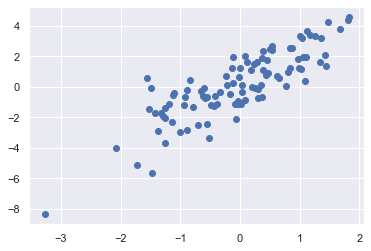

In [108]:
#plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; 

seaborn.set() # for plot styling

# first column, second column
plt.scatter(x[:, 0],x[:, 1])

<IPython.core.display.Javascript object>


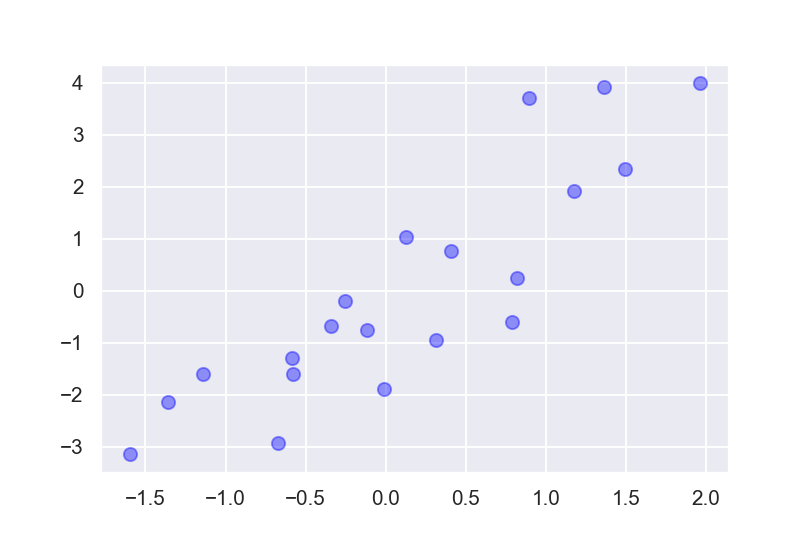

In [267]:
%matplotlib notebook

# plt.scatter(x[:, 0],x[:, 1], alpha = .3)
plt.scatter(selection[:,0],selection[:,1], c ='blue',s = 50, alpha = 0.4)

In [269]:
array1 = np.arange(9).reshape((3,3))
array2 = np.arange(3)
array1
array2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([0, 1, 2])

In [270]:
array = np.arange(4)

In [273]:
array1 * array2

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

In [271]:
#common vectorized computation methods
array1 + array2
array1 * array2
np.dot(array1, array2)
np.mean

np.max(array, axis = None) # or '0' for column-wise, or '1' for row-wise
np.maximum(array1, array2)
np.min(array, axis = None) # or '0' for column-wise, or '1' for row-wise
np.minimum(array1, array2)
np.median
np.cumsum
np.sqrt
np.exp
np.add
np.subtract

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10]])

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

array([ 5, 14, 23])

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>

3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

0

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

<function numpy.median(a, axis=None, out=None, overwrite_input=False, keepdims=False)>

<function numpy.cumsum(a, axis=None, dtype=None, out=None)>

<ufunc 'sqrt'>

<ufunc 'exp'>

<ufunc 'add'>

<ufunc 'subtract'>

In [116]:
array1 = np.arange(12).reshape((4,3))
array2 = np.random.randint(1,20,(3,4))

np.dot(array1, array2)
#np.mean(array1)
#print(array1)
#np.max(array1,axis=1)
#np.min(array1, axis = 0)

array([[ 28,  17,  18,  30],
       [ 94,  83,  66, 114],
       [160, 149, 114, 198],
       [226, 215, 162, 282]])

### Broadcasting
a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [516]:
# array add a scalar

# one dimension array
a = np.array([0,1,2])
a + 2

a
# two dimension array
M = np.ones((3,3))
M
M + a

# the one dimension array is stretched, or broadcast, across the second dimension 
# to match the dimension of M

array([2, 3, 4])

array([0, 1, 2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [523]:
a = np.arange(3)
b = np.arange(3).reshape((3,1))
# b = np.arange(3)[:, np.newaxis] # np.newaxis is used for extending dimensions 
a
b

# inputs are two 1 dimension arrays
# output is a 2 dimension array
a + b
a * b

array([0, 1, 2])

array([[0],
       [1],
       [2]])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

<br><br>
<center><img src="images/Numpy_3.JPG" width = "400"></center>
<center>Figure 3. NumPy broadcasting</center>

In [451]:
y
y + 1

array([[[99, 82, 77],
        [23, 24, 76]],

       [[57, 72, 44],
        [29, 31, 39]]])

array([[[100,  83,  78],
        [ 24,  25,  77]],

       [[ 58,  73,  45],
        [ 30,  32,  40]]])

In [526]:
# Broadcasting ex 1
# 2 dimension array
x = np.ones((2,3))
# 1 dimension array
y = np.arange(3)
x
y

x + y

array([[1., 1., 1.],
       [1., 1., 1.]])

array([0, 1, 2])

array([[1., 2., 3.],
       [1., 2., 3.]])

In [470]:
# Broadcasting ex 2
a = np.arange(3).reshape((3,1))
b = np.arange(3)

a
b

a + b

array([[0],
       [1],
       [2]])

array([0, 1, 2])

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [474]:
# Broadcasting ex 3
a = np.ones((3,2))
b = np.arange(3)
a # 3x2
b # 1x3

a + b

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

array([0, 1, 2])

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [477]:
b[:, np.newaxis]
a
a + b[:, np.newaxis]

array([[0],
       [1],
       [2]])

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [490]:
np.exp(a)
np.exp(b)

# np.exp(b)[:, np.newaxis]
# np.log(np.exp(a) + np.exp(b)[:, np.newaxis])

array([[2.71828183, 2.71828183],
       [2.71828183, 2.71828183],
       [2.71828183, 2.71828183]])

array([1.        , 2.71828183, 7.3890561 ])

In [502]:
# Broadcasting examples
a1 = np.arange(3)
a2 = np.ones((3,3),dtype='int')
a3 = np.ones((3,2),dtype='int')
a1
a2
a3
# print(a1.shape,'\n',a2.shape,'\n',a3.shape)
# a1 + 5

a1 + a2

a3 + a1
# a3 + a1.reshape(3,1)


array([0, 1, 2])

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

array([[1, 1],
       [1, 1],
       [1, 1]])

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [510]:
# centering an arrays
X = np.random.random((10,3))
X
X.mean(0)

array([[0.1971993 , 0.2737172 , 0.80664559],
       [0.12795214, 0.74832818, 0.15328873],
       [0.64007825, 0.56112099, 0.99771693],
       [0.59142874, 0.1258379 , 0.26427913],
       [0.21400439, 0.56670611, 0.03711501],
       [0.77855492, 0.12333906, 0.97831986],
       [0.91493149, 0.48018112, 0.64199802],
       [0.72634578, 0.76189613, 0.73617636],
       [0.27554977, 0.51399161, 0.31250207],
       [0.51614311, 0.33375313, 0.07894331]])

array([0.49821879, 0.44888714, 0.5006985 ])

In [3]:
x = np.arange(1, 6)
y = np.arange(2, 7)

#np.add(x,y)

#reduce: repeatedly applies a given operation to the elements of an array until only a single result remains.
np.add.reduce(x)
np.multiply.reduce(x)

#store all the intermediate results of the computation
np.add.accumulate(x)

#create a multiplication table
#np.outer : computer outer product of two vectors


array([ 1,  3,  6, 10, 15])

### Comparisons, Masks, and Boolean Logic

- Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion
    - Ex., count all values greater than a certain value
    - Ex., remove all outliers that are above some threshold

- Boolean masking: most efficient way to accomplish these types of tasks

In [781]:
pd.read_csv?

In [782]:
import numpy as np
import pandas as pd 

# https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/Seattle2014.csv

# use Pandas to extract rainfall inces as a NumPy array
rainfall = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv')['PRCP'].values
inches = rainfall/254 # 1/10mm -> inches
type(inches)
inches.shape

numpy.ndarray

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

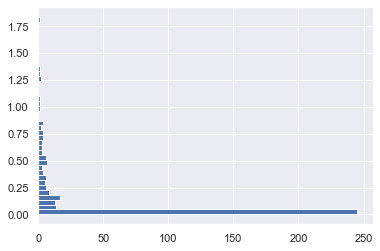

In [793]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
plt.hist(inches, 40, orientation='horizontal')

In [792]:
plt.hist?

#### Comparison Operators as ufuncs

NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise ufuncs.

In [543]:
x = np.array([1, 2, 3, 4, 5])
x < 3
x <= 3
x != 3
x == 3

array([ True,  True, False, False, False])

array([ True,  True,  True, False, False])

array([ True,  True, False,  True,  True])

array([False, False,  True, False, False])

In [544]:
# element-by-element comparison of 2 arrays
# ompound expressions
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [546]:
# compraison operators are implemented as ufuncs in NumPy
x < 3
np.less(x, 3)

array([ True,  True, False, False, False])

array([ True,  True, False, False, False])

| Operator | Equivalent ufunc |
|----------|------------------|
| ==       | np.equal         |
| !=       | np.not_equal     |
| <        | np.less          |
| <=       | np.less_equal    |
| >        | np.greater       |
| >=       | np.greater_equal |

In [794]:
# it works on any size array
rng = np.random.RandomState(0)
# np.seeds(0)
x = rng.randint(10, size = (3,4))
x

x < 6 
# equivalent ufuncs in Numpy
np.less(x, 6)

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

#### Working with boolean arrays

- `&` np.bitwise_and
- `|` np.bitwise_or
- `^` np.bitwise_xor
- `~` np.bitwise_not

Note: Python has built-in `sum()`, `any()`, and `all()` functions. These have different syntax than the NumPy versions. So you need to use `np.sum()`, `np.any()`, and `np.all()` for these instances.

In [801]:
# counting entries
x

# how many nonzero entries
np.count_nonzero(x)

# summation of entries
np.sum(x)

# count # of entries satisfying requirements
np.sum(x == 6)

# summation can be done along rows or columns
# how many values less than 6 in each row
np.sum(x < 6, axis = 1)

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

11

54

1

array([4, 2, 2])

In [798]:
np.sum?

In [813]:
# more examples
np.random.seed(1) # same as np.random.RandomState()
x = np.random.randint(1,100,(3,4))

print(x)

# are there any values greater than 8?
# return boolean
np.any(x > 8)

# are there any values in each column greater than 8 
# return boolean in an array
np.any(x > 8, axis = 0)

# are all values in each row less than 8?
# return boolean in array
np.all(x > 8, axis = 1)

# indexing
x[1]

# what values are greater than 8?
x > 8
x[x > 8]

[[38 13 73 10]
 [76  6 80 65]
 [17  2 77 72]]


True

array([ True,  True,  True,  True])

array([ True, False, False])

array([76,  6, 80, 65])

array([[ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True, False,  True,  True]])

array([6])

In [815]:
# boolean operators
# both are true -> true
# inches
np.sum((inches > 0.5) & (inches < 1))

29

In [606]:
# either one is true -> true
# both are false -> false
np.sum(~((inches <= 0.5) | (inches >= 1))) 

29

#### Boolean array as masks

In [621]:
# array
x

# obtain a boolean array for the condition
x < 5

# select these values from the array
x[x < 5]

array([[38, 13, 73, 10],
       [76,  6, 80, 65],
       [17,  2, 77, 72]])

array([[False, False, False, False],
       [False, False, False, False],
       [False,  True, False, False]])

array([2])

In [829]:
inches[summer]

array([0.        , 0.        , 0.        , 0.        , 0.07086614,
       0.09055118, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01181102,
       0.75984252, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01968504, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01968504,
       0.5       , 0.8503937 , 0.        , 0.03937008, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.33070866, 0.0511811 ,
       0.        , 0.11811024, 0.        , 0.        , 0.     

In [830]:
# a mask of all rainy days
rainy = (inches > 0)

# a mask of all summer days (Jun 21st is the 172nd day in a year)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

# calculate median of the rain during rainy days over the year
np.median(inches[rainy])
# median of the rain in the summer days
np.median(inches[summer])

np.max(inches[summer])

np.average(inches[rainy & summer])
np.average(inches[rainy & ~summer])

0.19488188976377951

0.0

0.8503937007874016

0.2066929133858267

0.3356009726725335

#### Using the Keywords and/or Versus the Operators & / |

- `and` and `or` gauge the truth or falsehood of entire object
    - When you use `and` or `or`, it’s equivalent to asking Python to treat the object as a single Boolean entity.
    - In Python, all nonzero integers will evaluate as `True`
    
- `& `and `|` refer to bits within each object.
    - When you use `&` and `|` on integers, the expression operates on the bits of the element
    - applying the `and` or the `or` to the individual bits making up the number

In [657]:
bool(42), bool(0)

bool(42 and 0)

bool(42 or 0)

(True, False)

False

True

In [655]:
# bin() method converts a specified integer number to its binary representation
bin(42)
bin(59)

bin(42 & 59)

bin(42 | 59)

'0b101010'

'0b111011'

'0b101010'

'0b111011'

In [663]:
# in NumPy array of boolean values
# a string of bits 1 = True and 0 = False
A = np.array([1, 0, 1, 0, 1, 0], dtype = bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype = bool)
A & B
A | B

array([ True, False,  True, False,  True, False])

array([ True,  True,  True, False,  True,  True])

In [664]:
# Use and will evaluate the truth or falsehood of the entire array object
# which is not well-defined
A and B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [674]:
# when using boolean expression on given array
# use | or & rather than or or and
x = np.arange(10)
x

(x > 4) & (x < 8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([False, False, False, False, False,  True,  True,  True, False,
       False])

### Practice 

Work with `president_heights.csv` dataset.
1. Use `df = pd.read_csv(url, index_col = 0)` to load the data into Jupyter Notebook and assign it to the object `df`. The link of the dataset is https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv.

2. Extract the height column and convert data table to Numpy array using `height = np.array(df['height(cm)'])`.

3. Find mean, median, min, and max in the `height` array. 

4. Find heights greater than 165cm and less than 185cm.

In [831]:
#president_heights.csv

#https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/president_heights.csv

import pandas as pd
url = 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv'
df = pd.read_csv(url,index_col = 0)
df

,name,height(cm)
order,,
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


In [832]:
type(df)

pandas.core.frame.DataFrame

In [834]:
height = np.array(df['height(cm)'])
height

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185], dtype=int64)

In [839]:
# use NumPy functions
np.average(height)
np.std(height)
np.min(height)
np.max(height)

179.73809523809524

6.931843442745892

163

193

In [835]:
#check basic statistics
print("Mean height: ", height.mean())
print("Standard deviation:", height.std())
print("Minimum height: ", height.min())
print("Maximum height: ", height.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


In [842]:
#find heights greater than 165cm and less than 185cm
height[(height > 165) & (height < 185)]

array([170, 183, 171, 168, 173, 183, 173, 173, 175, 178, 183, 178, 173,
       174, 183, 183, 168, 170, 178, 182, 180, 183, 178, 182, 175, 179,
       183, 182, 183, 177, 182], dtype=int64)

### Sorting arrays

There are some algorithms related to sorting values in NumPy arrays.

In [843]:
#sorting
np.random.seed(1)
x = np.random.randint(1,100,(3,4))

print(x)
#np.sort()
#sort arrays without modifying the input

# sort row
np.sort(x, axis = 1)
# sort column
np.sort(x, axis = 0)

#np.argsort(): returns the indices of the sorted elements
np.argsort(x, axis = 1)
np.argsort(x, axis = 0)

type(np.argsort(x))

[[38 13 73 10]
 [76  6 80 65]
 [17  2 77 72]]


array([[10, 13, 38, 73],
       [ 6, 65, 76, 80],
       [ 2, 17, 72, 77]])

array([[17,  2, 73, 10],
       [38,  6, 77, 65],
       [76, 13, 80, 72]])

array([[3, 1, 0, 2],
       [1, 3, 0, 2],
       [1, 0, 3, 2]], dtype=int64)

array([[2, 2, 0, 0],
       [0, 1, 2, 1],
       [1, 0, 1, 2]], dtype=int64)

numpy.ndarray

In [694]:
np.sort?

In [702]:
x = np.array([2, 1, 4, 3, 5])
x[2 + np.argmin(x[2:])]

3

### Numpy structured arrays

This section demonstrates the use of NumPy’s structured arrays and record arrays, which provide efficient storage for compound, heterogeneous data.

In [9]:
import numpy as np

np.random.randint(1, 20, 20)

array([16, 14,  3, 17,  8, 19, 15,  7,  9, 11, 16, 12, 17,  3, 15, 18,  4,
        7,  5, 17])

In [706]:
#Numpy structured arrays
#provide efficient storage for compound, heterogeneous data

name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

# we used to create a simple array
np.zeros(4, dtype = int)

# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
'formats':('U10', 'int', 'float')})

print(data.dtype)
# U10: Unicode string of maximum length 10
# i4: 4-byte (i.e., 32 bit) integer,
# f8: 8-byte (i.e., 64 bit) float

data

array([0, 0, 0, 0])

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


array([('', 0, 0.), ('', 0, 0.), ('', 0, 0.), ('', 0, 0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [844]:
data['name'] = name
data['age'] = age
data['weight'] = weight

data

type(data)

data.shape

array([('Alice', 25, 55. ), ('Bob', 45, 85.5), ('Cathy', 37, 68. ),
       ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

numpy.ndarray

(4,)

In [847]:
# get first row
data[0]

# get name from last row
data[0]['weight']

('Alice', 25, 55.)

55.0

In [722]:
# get rows where age < 30
data[data['age'] < 30]

# get names where age < 30
data['name'][data['age'] < 30]

array([('Alice', 25, 55. ), ('Doug', 19, 61.5)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

array(['Alice', 'Doug'], dtype='<U10')

#### Create structured arrays

In [723]:
# dictionary method
np.dtype({
    'names':('name', 'age', 'weight'),
    'formats':('U10', 'i4', 'f8')
})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [724]:
# specified with Python types or NumPy dtypes
np.dtype({
    'names':('name', 'age', 'weight'),
    'formats':((np.str_,10), int, np.float32)
})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [726]:
# specified as a list of tuples
np.dtype([('name', 'S10'), ('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [727]:
# specified without names
np.dtype('S10, i4, f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

In [22]:
# ex.,
# create structured array with 2 characteristics
# 1. id (int) ; 2. age (float)
tp = np.dtype([('id', 'i8'), ('age', 'f8')])
# create structured array with only 1 element
x = np.zeros(1, dtype = tp)

x['id'] = [18]
x['age'] = [24.5]
x

array([(18, 24.5)], dtype=[('id', '<i8'), ('age', '<f8')])

In [30]:
print(x['id'][0])
print(x[0]['id'])

18
18


In [ ]:
import numpy as np

In [49]:
# exercise
# create a structured array for store employees
# we have 4 people in the store, each person has 4 characteristics
# 1. name 'U10' 2. cellphone 'i8' 3. age 'f8' 4. working title 'S10'
name = ['Tom','Mary', 'Caren', 'Jack']
cellphone = [917888888, 917555555, 917444444, 917333333]
age = [19,20,49,32]
title = ['staff', 'staff', 'manager', 'staff']
employee_type = np.dtype([('name', 'U10'), ('cellphone', 'i8'), ('age','f8'), ('title','U10')])
employee = np.zeros(4, dtype = employee_type)

employee['name'] = name
employee['cellphone'] = cellphone
employee['age'] = age
employee['title'] = title

# title of the first employee
employee['title'][0]

'staff'